<a href="https://colab.research.google.com/github/shettyprasadgithub076/Image_Classification_using_ML_Technique/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from matplotlib.colors import ListedColormap
import os
from PIL import Image


In [ ]:
class Net(nn.Module):
    def __init__(self,size_input,H,size_output):
        super(Net,self).__init__()
        self.Linear1=nn.Linear(size_input,H)
        self.Linear2=nn.Linear(H,1)

    def forward(self,x):
        x=torch.sigmoid(self.Linear1(x))
        x=torch.sigmoid(self.Linear2(x))
        return x

In [ ]:
# Define the class XOR_Data

class XOR_Data(Dataset):

    # Constructor
    # N_s is the size of the dataset
    def __init__(self, N_s=100):
        # Create a N_s by 2 array for the X values representing the coordinates
        self.x = torch.zeros((N_s, 2))
        # Create a N_s by 1 array for the class the X value belongs to
        self.y = torch.zeros((N_s, 1))
        # Split the dataset into 4 sections
        for i in range(N_s // 4):
            # Create data centered around (0,0) of class 0
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])

            # Create data centered around (0,1) of class 1
            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])

            # Create data centered around (1,0) of class 1
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])

            # Create data centered around (1,1) of class 0
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            # Add some noise to the X values to make them different
            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):
        return self.x[index],self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()


In [ ]:


model=Net(2,1,1) # one neuron
#model=Net(2,2,1) # two neuron
#model=Net(2,3,1) # three neuron

In [ ]:
data_set=XOR_Data()
def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

def train(data_set, model, criterion, train_loader, optimizer, epochs):

    COST = []
    ACC = []
    best_accuracy=0

    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total+=loss.item()
        acc=accuracy(model, data_set)
        ACC.append(acc)
        COST.append(total)
        if acc>best_accuracy:
            best_accuracy=acc

        print(f"Epoch:{epoch},  Accuracy:{acc},  Loss:{total:.4f}")
    return COST,ACC,best_accuracy



learning_rate = 0.1

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_loader = DataLoader(dataset=data_set, batch_size=1)

cost,accuracy,best_accuracy = train(data_set, model, criterion, train_loader, optimizer, epochs=10)

print(best_accuracy)




Epoch:0,  Accuracy:0.5,  Loss:64.6369
Epoch:1,  Accuracy:0.5,  Loss:64.1333
Epoch:2,  Accuracy:0.5,  Loss:64.2731
Epoch:3,  Accuracy:0.5,  Loss:64.3901
Epoch:4,  Accuracy:0.5,  Loss:64.4774
Epoch:5,  Accuracy:0.5,  Loss:64.5431
Epoch:6,  Accuracy:0.5,  Loss:64.5932
Epoch:7,  Accuracy:0.5,  Loss:64.6318
Epoch:8,  Accuracy:0.5,  Loss:64.6616
Epoch:9,  Accuracy:0.5,  Loss:64.6846
0.5


# __Neural Network Rectified Linear Unit (ReLU) vs Sigmoid__


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import os
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 172064244.13it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 124369295.51it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 48562901.72it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 24423754.83it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [ ]:
class Net(nn.Module):
    def __init__(self,size_input,H1,H2,size_output):
        super(Net,self).__init__()
        self.Linear1=nn.Linear(size_input,H1)
        self.Linear2=nn.Linear(H1,H2)
        self.linear3=nn.Linear(H2,size_output)

    def forward(self,x):
        x=torch.sigmoid(self.Linear1(x))
        x=torch.sigmoid(self.Linear2(x))
        x=self.linear3(x)
        return x

In [ ]:
class NetRelu(nn.Module):
    def __init__(self,size_input,H1,H2,size_output):
        super(NetRelu,self).__init__()
        self.Linear1=nn.Linear(size_input,H1)
        self.Linear2=nn.Linear(H1,H2)
        self.linear3=nn.Linear(H2,size_output)

    def forward(self,x):
        x=torch.relu(self.Linear1(x))
        x=torch.relu(self.Linear2(x))
        x=self.linear3(x)
        return x

In [ ]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    training_loss=[]
    validation_accuracy=[]
    best_accuracy=0
    #useful_stuff = {'training_loss': [], 'validation_accuracy': []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss=loss.data.item()
            training_loss.append(loss)
            #useful_stuff['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()

        # Saves the percent accuracy
        accuracy = 100 * (correct / len(validation_dataset))
        validation_accuracy.append(accuracy)

        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_epoch=epoch

        print(f"Epoch: {epoch + 1}/{epochs} , Training_Loss: {loss:.4f} , Validation_accuracy:{accuracy} %")
        print()

    return training_loss,validation_accuracy,best_epoch


criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=1, shuffle=False)

input_dim = 28 * 28 # Diemension of an image
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10 # Number of classes



In [ ]:
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_loss,validation_accuracy,best_epoch = train(model, criterion, train_loader, validation_loader, optimizer, epochs=20)

Epoch: 1/20 , Training_Loss: 0.0046 , Validation_accuracy:91.57 %

Epoch: 2/20 , Training_Loss: 0.0023 , Validation_accuracy:94.13 %

Epoch: 3/20 , Training_Loss: 1.0742 , Validation_accuracy:94.74000000000001 %

Epoch: 4/20 , Training_Loss: 1.3943 , Validation_accuracy:95.17 %

Epoch: 5/20 , Training_Loss: 0.0038 , Validation_accuracy:96.48 %

Epoch: 6/20 , Training_Loss: 0.0112 , Validation_accuracy:96.61 %

Epoch: 7/20 , Training_Loss: 0.1196 , Validation_accuracy:96.67999999999999 %

Epoch: 8/20 , Training_Loss: 0.0002 , Validation_accuracy:96.67999999999999 %

Epoch: 9/20 , Training_Loss: 0.0013 , Validation_accuracy:96.97 %

Epoch: 10/20 , Training_Loss: 0.0001 , Validation_accuracy:96.35000000000001 %

Epoch: 11/20 , Training_Loss: 0.0006 , Validation_accuracy:96.99 %

Epoch: 12/20 , Training_Loss: 0.0001 , Validation_accuracy:97.24000000000001 %

Epoch: 13/20 , Training_Loss: 0.0000 , Validation_accuracy:97.18 %

Epoch: 14/20 , Training_Loss: 0.0000 , Validation_accuracy:97.240

In [ ]:
print(best_epoch)

16


In [ ]:
learning_rate = 0.01
model = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_loss_relu,validation_accuracy_relu,best_epoch_relu = train(model, criterion, train_loader, validation_loader, optimizer, epochs=20)

Epoch: 1/20 , Training_Loss: 0.0002 , Validation_accuracy:95.56 %

Epoch: 2/20 , Training_Loss: 0.0199 , Validation_accuracy:96.05 %

Epoch: 3/20 , Training_Loss: 0.0007 , Validation_accuracy:96.86 %

Epoch: 4/20 , Training_Loss: 0.0000 , Validation_accuracy:97.23 %

Epoch: 5/20 , Training_Loss: 0.0000 , Validation_accuracy:95.97 %

Epoch: 6/20 , Training_Loss: 0.0000 , Validation_accuracy:97.09 %

Epoch: 7/20 , Training_Loss: 0.0189 , Validation_accuracy:97.23 %

Epoch: 8/20 , Training_Loss: 0.0006 , Validation_accuracy:96.59 %

Epoch: 9/20 , Training_Loss: 0.0003 , Validation_accuracy:97.56 %

Epoch: 10/20 , Training_Loss: 1.0477 , Validation_accuracy:97.25 %

Epoch: 11/20 , Training_Loss: 0.0000 , Validation_accuracy:97.11 %

Epoch: 12/20 , Training_Loss: 0.0000 , Validation_accuracy:97.31 %

Epoch: 13/20 , Training_Loss: 0.0000 , Validation_accuracy:97.49 %

Epoch: 14/20 , Training_Loss: 0.0000 , Validation_accuracy:97.5 %

Epoch: 15/20 , Training_Loss: 0.0000 , Validation_accuracy

In [ ]:
print(best_epoch_relu)

17


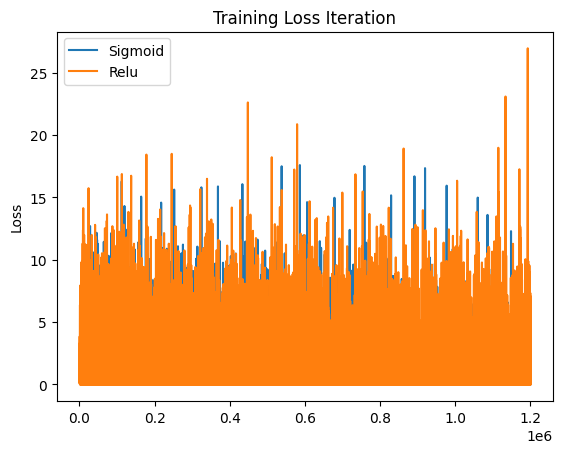

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_loss,label='Sigmoid')
plt.plot(training_loss_relu,label='Relu')
plt.ylabel('Loss')
plt.title("Training Loss Iteration")
plt.legend()
plt.show()

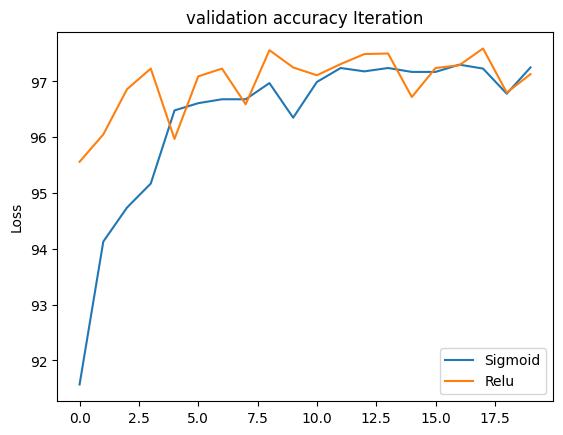

In [ ]:
import matplotlib.pyplot as plt
plt.plot(validation_accuracy,label='Sigmoid')
plt.plot(validation_accuracy_relu,label='Relu')
plt.ylabel('Loss')
plt.title("validation accuracy Iteration")
plt.legend()
plt.show()

# **Cat Dog Image Classification using NN**